# Load RMSEs

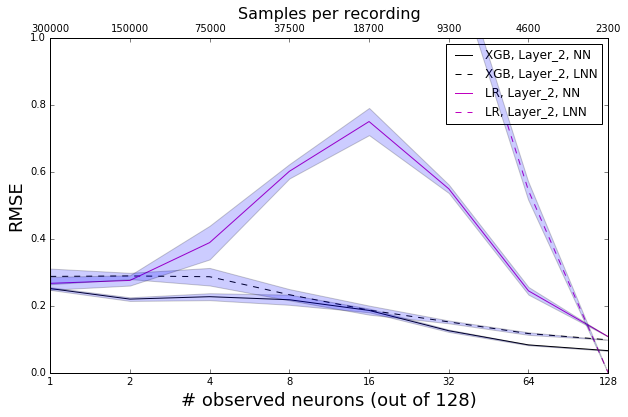

In [68]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np
import pickle

figName = 'figures/Layer_2_RMSEs_10_Recordings'
x = [2**x for x in range(8)]
x=range(len(x))
fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, len(x)-1])
ax2 = ax1.twiny()


networks =['NN', 'LNN']
layers =[0,1,2, 3]
nRecordings =10
methods =['XGB', 'LR']
lstyles =['-',  '--']
colors =['k', 'm']

for iMethod in range(len(methods)):
    for iNetwork in range(len(networks)):
        for iLayer in [2]:#,2]:
            fName = 'results/'+ methods[iMethod] + '_RMSES_Layer'+ str(iLayer) + 'nRec' + str(nRecordings) + networks[iNetwork] + '.dat'
            with open(fName,'rb') as f:
                rmses = pickle.load(f)
            f.close()
            y = np.mean(np.median(rmses, axis=1), axis=0)
            error = np.std(np.mean(rmses, axis=1), axis=0)
            ax1.plot(x, y, label=methods[iMethod]+', Layer_'+ str(iLayer)+ ', '+ networks[iNetwork], color=colors[iMethod], \
                     linestyle=lstyles[iNetwork])
            pl.fill_between(x, y-error, y+error, alpha=0.2)


legend = ax1.legend(loc='upper right', shadow=False)
ax1.set_xlabel('# observed neurons (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=16)


ax2.set_xlim(ax1.get_xlim())
ax1.set_xticklabels( [2**x for x in range(8)])
nSamples = [300000, 150000, 75000, 37500, 18700]
nSamples = np.divide(int(30000/nRecordings),[2**x for x in range(8)])*100

ax2.set_xticklabels(nSamples)
ax1.set_ylabel('RMSE', fontsize=18)
yl = ax1.get_ylim()
#ax1.set_ylim([0, yl[1]])
ax1.set_ylim([0, 1])

pl.draw()
pl.savefig(figName+'.pdf', format='pdf')
pl.savefig(figName+'.eps', format='eps', dpi=1000)


In [45]:
fName

'results/XGB_RMSES_Layer0nRec10LNN.dat'

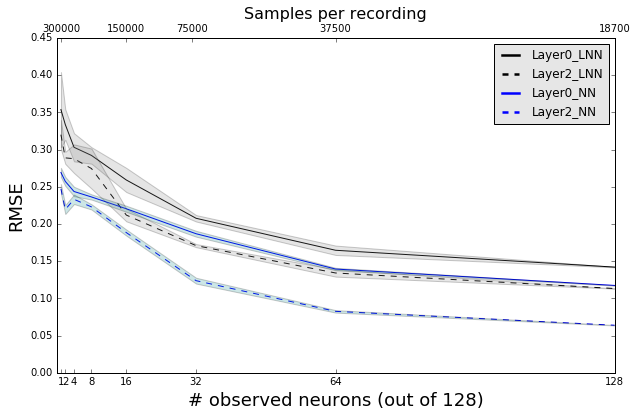

In [44]:
import matplotlib.pyplot as pl
%matplotlib inline
import numpy as np

fig = pl.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax1.set_xlim([0, 128])
ax2 = ax1.twiny()

x = [2**x for x in range(8)]




y = np.mean(np.median(RMSE_Layer2_LNN, axis=1), axis=0)
error = np.std(np.mean(RMSE_Layer2_LNN, axis=1), axis=0)
ax1.plot(x, y, 'k--', label='Layer2_LNN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#848484')

y = np.mean(np.median(RMSE_Layer0_NN, axis=1), axis=0)
error = np.std(np.mean(RMSE_Layer0_NN, axis=1), axis=0)
ax1.plot(x, y, 'b-', label='Layer0_NN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#008080')

y = np.mean(np.median(RMSE_Layer2_NN, axis=1), axis=0)
ax1.plot(x, y, 'b--', label='Layer2_NN')
pl.fill_between(x, y-error, y+error, alpha=0.2, facecolor='#048484')


ax1.set_xlabel('# observed neurons (out of 128)', fontsize=18)
ax2.set_xlabel('Samples per recording',  fontsize=16)

new_tick_locations = x
ax1.set_xlim(ax1.get_xlim())
ax1.set_xticks(new_tick_locations)
ax1.set_xticklabels(new_tick_locations)
ax1.set_ylabel('RMSE', fontsize=18)
ax1.set_ylim([0, .45])

legend = ax1.legend(loc='upper right', shadow=False)

frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(2.5)  # the legend line width


new_tick_locations = [1,16,31,64,128]
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
nSamples = [300000, 150000, 75000, 37500, 18700]
ax2.set_xticklabels(nSamples)

#bl = np.std(layer_outs_test[oLayer]-np.mean(layer_outs_test[oLayer]));
# horiz_line_data = np.array([bl for i in xrange(len(x))])
# pl.plot(x, horiz_line_data, 'k--') 
# pl.text(110,bl+0.005, 'baseline')

